In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [4]:
base_path = "https://raw.githubusercontent.com/abulbasar/data/master"
df = pd.read_csv(base_path + "/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [6]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
y = LabelEncoder().fit_transform(df.default)
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0,

In [11]:
pd.Series(y).value_counts()

0    700
1    300
dtype: int64

In [22]:
X = df.copy()
del X["default"]
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
months_loan_duration                     1000 non-null int64
amount                                   1000 non-null int64
installment_rate                         1000 non-null int64
residence_history                        1000 non-null int64
age                                      1000 non-null int64
existing_credits                         1000 non-null int64
dependents                               1000 non-null int64
checking_balance_1 - 200 DM              1000 non-null uint8
checking_balance_< 0 DM                  1000 non-null uint8
checking_balance_> 200 DM                1000 non-null uint8
checking_balance_unknown                 1000 non-null uint8
credit_history_critical                  1000 non-null uint8
credit_history_delayed                   1000 non-null uint8
credit_history_fully repaid              1000 non-null uint8
credit_history_fully repaid this bank   

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [26]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.76333333333333331

In [32]:
y_test_pred = lr.predict(X_test)
(y_test_pred == y_test).sum() / len(y_test)

0.76333333333333331

In [38]:
confusion_matrix(y_test, y_test_pred)

array([[189,  25],
       [ 46,  40]])

In [34]:
confusion_matrix?

In [39]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [42]:
X = df.iloc[:, 1:29]
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


In [43]:
y = df.Class

In [44]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [45]:
284315 / len(y) 

0.9982725143693799

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, 
                                                    test_size = 0.3, random_state = 1)

In [47]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
print("accuracy:", lr.score(X_test, y_test))
confusion_matrix(y_test, lr.predict(X_test))

accuracy: 0.999157332959


array([[85293,    15],
       [   57,    78]])

In [48]:
pd.Series(y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [56]:
y_test_pred = np.where(lr.predict_proba(X_test)[:, 1] > 0.3, 1, 0)
confusion_matrix(y_test, y_test_pred)

array([[85287,    21],
       [   50,    85]])

In [53]:
pd.DataFrame(lr.predict_proba(X_test))

,0,1
0,0.999762,0.000238
1,0.999805,0.000195
2,0.999854,0.000146
3,0.999954,0.000046
4,0.998904,0.001096
5,0.999767,0.000233
6,0.998822,0.001178
7,0.999952,0.000048
8,0.999762,0.000238
9,0.999905,0.000095


In [2]:
iris = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

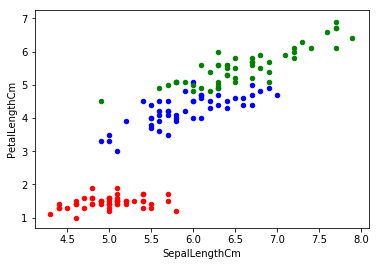

In [9]:
columns = ["SepalLengthCm", "PetalLengthCm"]
colors = ["red", "blue", "green"]
fig, ax = plt.subplots()
for i, v in enumerate(iris.Species.unique()):
    iris[iris.Species == v].plot.scatter(columns[0],columns[1], ax = ax, color = colors[i])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [31]:
X = iris.loc[:, columns].values
y = LabelEncoder().fit_transform(iris.Species.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3, random_state = 1)

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.80000000000000004

In [30]:
from mlxtend.plotting.decision_regions import plot_decision_regions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

Text(0.5,1,'Decision region for the classifier')

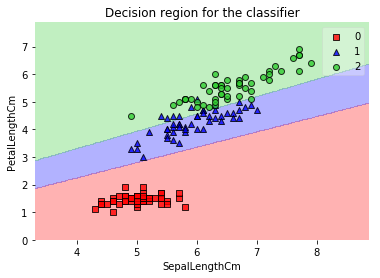

In [24]:
plot_decision_regions(X, y, lr)
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title("Decision region for the classifier")

In [25]:
lr.coef_

array([[ 1.42009767, -3.0217716 ],
       [-0.54116015,  0.50319206],
       [-2.23750394,  3.20333361]])

0.97777777777777775

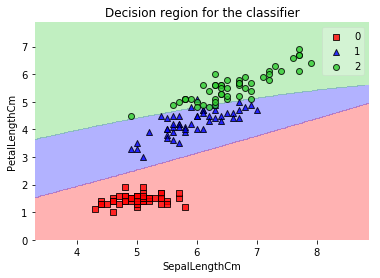

In [36]:
pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lr", LogisticRegression())
])
pipeline.fit(X_train, y_train)
plot_decision_regions(X, y, pipeline)
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title("Decision region for the classifier")
pipeline.score(X_test, y_test)